# Wine type prediction

In [79]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from collections import Counter
from sklearn import model_selection,linear_model,metrics
import seaborn as sns
from statistics import mean
from matplotlib import style

## Introduction

Recently people like to drink alchol and wine plays an really important rule in the alchol family. In this project I will use the dataset from kaggles to predict the type of the wine such as red wine and white wine according to other 10 different variables including fixed acidity, volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality, in which all the variables except the quality, and type are continuous numerical variables. This project is published on github with the name of [Wine_quality_analysis](https://github.com/harrysyz99/Wine_quality_analysis)

## Dataset

This dataset is from kaggle free and public dataset the original name of the datset is called [Wine Quality](https://www.kaggle.com/datasets/rajyellow46/wine-quality). According to the discription this dataset is originally from the UCI data set website, which is called the same name [wine Quality on UCI](https://archive.ics.uci.edu/ml/datasets/wine+quality),these two links has been copied to the references part at the end. These data set have is ordered by the type of the wine but the sample size between two types of the wine are different. Therefore when I preprocessed the dataset I need to do some spliting first. 

The next cell is loading the data and since there are some of the variables have na existed and in order to avoid the possible conflict, I used the dropna() function to drop every NA from the dataset.

In [2]:
winedataset = pd.read_csv("winequalityN.csv").dropna()
winedataset

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


As I mentioned before the sample size between two type of the wine are diffenence and we can find out that there is a huge difference between two types. Since we will split the train test data I will randomly select 1593 white wine out of the 4870 white wine. In order to make sure that when we split the train and testing data we could have the same sample size between two types of wine in order to avoid any bias situation.

In [3]:
typecount = winedataset.groupby("type").size()
typecount

type
red      1593
white    4870
dtype: int64

<BarContainer object of 2 artists>

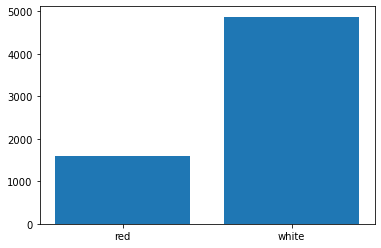

In [4]:
plt.bar(x = ["red","white"], height=[typecount["red"],typecount["white"]])

In [5]:
index = random.sample(list(range(0,4870,1)),1593)
white = winedataset[winedataset.type == "white"].iloc[index]
white
red = winedataset[winedataset.type == "red"]
red

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4898,red,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
4899,red,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
4900,red,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
4901,red,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4902,red,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
finaldata = pd.concat([white,red])
finaldata

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
65,white,6.2,0.350,0.03,1.2,0.064,29.0,120.0,0.99340,3.22,0.54,9.1,5
46,white,6.2,0.450,0.26,4.4,0.063,63.0,206.0,0.99400,3.27,0.52,9.8,4
1891,white,7.6,0.330,0.41,13.7,0.045,44.0,197.0,0.99890,3.18,0.64,9.1,5
2098,white,7.4,0.180,0.36,13.1,0.056,72.0,163.0,1.00000,3.42,0.35,9.1,6
4523,white,6.7,0.180,0.25,14.3,0.048,79.0,149.0,0.99750,3.12,0.37,9.7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [7]:
finaldata.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

The above dataset is the final dataset that have all the information neeeded. 

## First insight of the dataset

In this section I will use plenty of plots to shows the trend relationship statistical feature of the dataset itself. 

In [8]:
list(finaldata.columns.values)

['type',
 'fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

<AxesSubplot:>

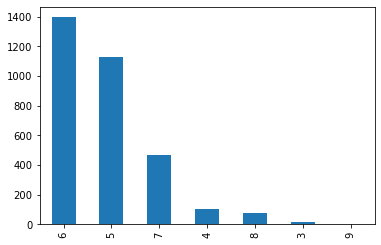

In [9]:
finaldata["quality"].value_counts().plot(kind='bar')


according to the above plot we can find out that most of the wine quality has been graded as 6.

Then I will find the relationship between wine type and each other variables.

<AxesSubplot:xlabel='type', ylabel='quality'>

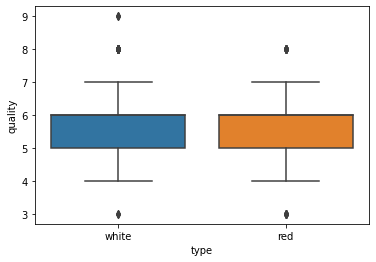

In [10]:
sns.boxplot(x = "type", y ="quality",data = finaldata)

From this above plot we can find out that the distribution between these two types of wine and the quality is almost the same therefore we do not need to do any process to the variables of quality.

<AxesSubplot:xlabel='type', ylabel='fixed acidity'>

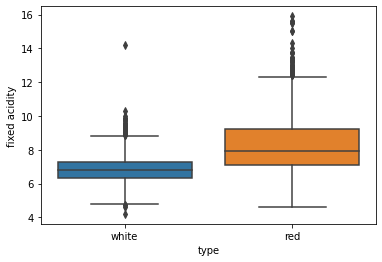

In [11]:
sns.boxplot(x = "type", y ='fixed acidity',data = finaldata)

<AxesSubplot:xlabel='type', ylabel='volatile acidity'>

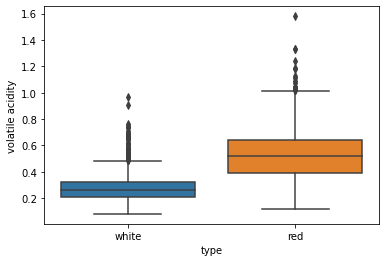

In [12]:
sns.boxplot(x = "type", y ='volatile acidity',data = finaldata)

<AxesSubplot:xlabel='type', ylabel='citric acid'>

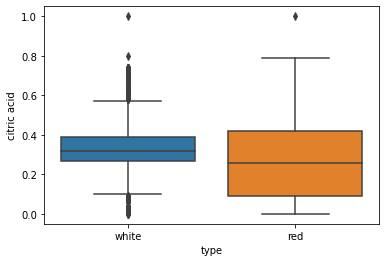

In [13]:
sns.boxplot(x = "type", y ='citric acid',data = finaldata)

<AxesSubplot:xlabel='type', ylabel='residual sugar'>

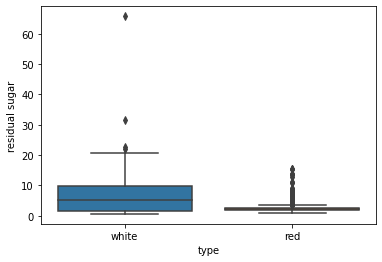

In [14]:
sns.boxplot(x = "type", y ='residual sugar',data = finaldata)

<AxesSubplot:xlabel='type', ylabel='chlorides'>

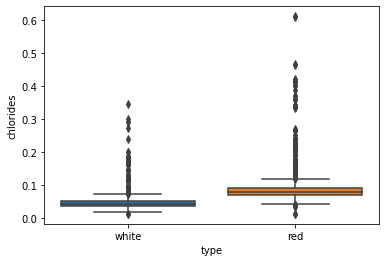

In [15]:
sns.boxplot(x = "type", y ='chlorides',data = finaldata)

<AxesSubplot:xlabel='type', ylabel='free sulfur dioxide'>

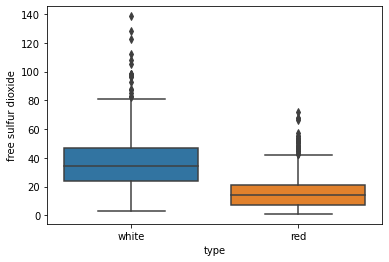

In [16]:
sns.boxplot(x = "type", y ='free sulfur dioxide',data = finaldata)

<AxesSubplot:xlabel='type', ylabel='total sulfur dioxide'>

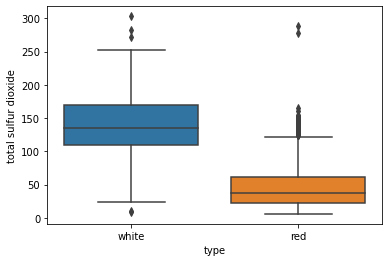

In [17]:
sns.boxplot(x = "type", y ='total sulfur dioxide',data = finaldata)

<AxesSubplot:xlabel='type', ylabel='density'>

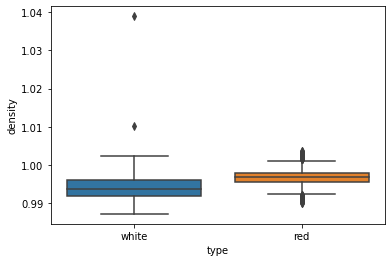

In [18]:
sns.boxplot(x = "type", y ='density',data = finaldata)

<AxesSubplot:xlabel='type', ylabel='pH'>

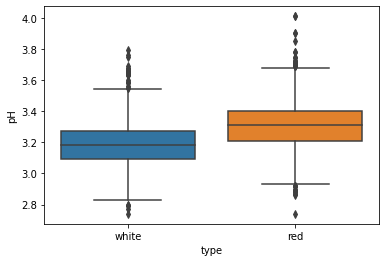

In [19]:
sns.boxplot(x = "type", y ='pH',data = finaldata)

<AxesSubplot:xlabel='type', ylabel='sulphates'>

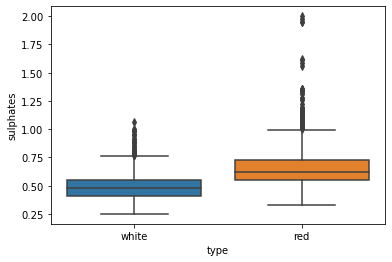

In [20]:
sns.boxplot(x = "type", y ='sulphates',data = finaldata)

<AxesSubplot:xlabel='type', ylabel='alcohol'>

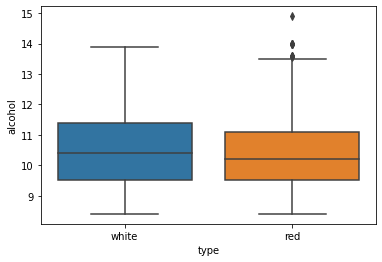

In [21]:
sns.boxplot(x = "type", y ='alcohol',data = finaldata)

According to the above data we can find out that the quality, alcohol, citric acid do not have a huge differences between white and red wine, and  sulphates,pH,chlorides have small difference in between. Therefore I will start to use some variables which do not have much differences. 

## Data Spliting

In [22]:
y = finaldata["type"]
trainx, testx,trainy,testy = model_selection.train_test_split(finaldata,y,test_size = 0.3)
trainx = trainx.drop(columns = "type")
testx = testx.drop(columns = "type")

In [23]:
trainx

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6168,5.0,0.380,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.0,6
5271,7.4,0.550,0.22,2.2,0.106,12.0,72.0,0.99590,3.05,0.63,9.2,5
6487,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
238,7.0,0.260,0.59,1.4,0.037,40.0,120.0,0.99180,3.34,0.41,11.1,7
4141,6.8,0.280,0.29,11.9,0.052,51.0,149.0,0.99544,3.02,0.58,10.4,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1692,7.0,0.240,0.30,4.2,0.040,41.0,213.0,0.99270,3.28,0.49,11.8,6
5918,11.3,0.360,0.66,2.4,0.123,3.0,8.0,0.99642,3.20,0.53,11.9,6
3910,7.1,0.370,0.30,6.2,0.040,49.0,139.0,0.99021,3.17,0.27,13.6,6
5521,7.9,0.510,0.25,2.9,0.077,21.0,45.0,0.99740,3.49,0.96,12.1,6


Since the originally type of the type variables is a object type variables, However in order to use the Lasso Regression, Linear Regression, and Logistic Regression we need to make our prediction variables into dummy variables type as follows.

In [24]:
trainy = pd.get_dummies(trainy)
trainy

,red,white
6168,1,0
5271,1,0
6487,1,0
238,0,1
4141,0,1
...,...,...
1692,0,1
5918,1,0
3910,0,1
5521,1,0


In [25]:
trainy = trainy.drop(columns = "red")

In [26]:
trainy

,white
6168,0
5271,0
6487,0
238,1
4141,1
...,...
1692,1
5918,0
3910,1
5521,0


In [27]:
testx

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
5388,9.3,0.775,0.27,2.8,0.078,24.0,56.0,0.99840,3.31,0.67,10.6,6
415,7.3,0.280,0.36,12.7,0.040,38.0,140.0,0.99800,3.30,0.79,9.6,6
3867,7.3,0.250,0.26,7.2,0.048,52.0,207.0,0.99587,3.12,0.37,9.2,5
4129,6.3,0.340,0.31,6.0,0.020,18.0,68.0,0.98981,3.22,0.29,13.4,7
6215,9.9,0.440,0.46,2.2,0.091,10.0,41.0,0.99638,3.18,0.69,11.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
6465,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
5483,7.6,0.510,0.24,2.4,0.091,8.0,38.0,0.99800,3.47,0.66,9.6,6
4443,7.2,0.470,0.16,5.9,0.048,14.0,125.0,0.99428,3.09,0.49,9.8,5
5576,8.3,0.780,0.10,2.6,0.081,45.0,87.0,0.99830,3.48,0.53,10.0,5


In [28]:
testy = pd.get_dummies(testy)

In [29]:
testy = testy.drop(columns= "red")

In [30]:
testy

,white
5388,0
415,1
3867,1
4129,1
6215,0
...,...
6465,0
5483,0
4443,1
5576,0


# Initial Model

In [31]:
trainx

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6168,5.0,0.380,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.0,6
5271,7.4,0.550,0.22,2.2,0.106,12.0,72.0,0.99590,3.05,0.63,9.2,5
6487,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
238,7.0,0.260,0.59,1.4,0.037,40.0,120.0,0.99180,3.34,0.41,11.1,7
4141,6.8,0.280,0.29,11.9,0.052,51.0,149.0,0.99544,3.02,0.58,10.4,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1692,7.0,0.240,0.30,4.2,0.040,41.0,213.0,0.99270,3.28,0.49,11.8,6
5918,11.3,0.360,0.66,2.4,0.123,3.0,8.0,0.99642,3.20,0.53,11.9,6
3910,7.1,0.370,0.30,6.2,0.040,49.0,139.0,0.99021,3.17,0.27,13.6,6
5521,7.9,0.510,0.25,2.9,0.077,21.0,45.0,0.99740,3.49,0.96,12.1,6


For the first model I will use the variables which do not have a huge difference between red adnn white wine, which are quality, alcohol, citric acid

In [32]:
train_new = trainx[["quality", "alcohol", "citric acid"]]
train_new

,quality,alcohol,citric acid
6168,6,14.0,0.01
5271,5,9.2,0.22
6487,5,9.2,0.20
238,7,11.1,0.59
4141,6,10.4,0.29
...,...,...,...
1692,6,11.8,0.30
5918,6,11.9,0.66
3910,6,13.6,0.30
5521,6,12.1,0.25


In [33]:
test_new = testx[["quality", "alcohol", "citric acid"]]
test_new

,quality,alcohol,citric acid
5388,6,10.6,0.27
415,6,9.6,0.36
3867,5,9.2,0.26
4129,7,13.4,0.31
6215,6,11.9,0.46
...,...,...,...
6465,5,10.1,0.13
5483,6,9.6,0.24
4443,5,9.8,0.16
5576,5,10.0,0.10


In [34]:
lgm = linear_model.LinearRegression()
lgm.fit(train_new, trainy)

LinearRegression()

In [35]:
lgm.score(train_new,trainy)

0.049202845732843614

In [36]:
MSEtrainlgm = metrics.mean_squared_error(trainy, lgm.predict(train_new))
MSEtestlgm = metrics.mean_squared_error(testy,lgm.predict(test_new))
MSEtestlgm

0.2347641126325617

In [37]:
lasso = linear_model.Lasso()
lasso.fit(train_new, trainy)

Lasso()

In [38]:
lasso.score(train_new,trainy)

0.0

In [39]:
lasso.score(test_new,testy)

-0.00043783981449463383

In [40]:
MSEtrainlasso = metrics.mean_squared_error(trainy, lasso.predict(train_new))
MSEtestlasso = metrics.mean_squared_error(testy,lasso.predict(test_new))
MSEtestlasso

0.25005582222171363

In [41]:
logit = linear_model.LogisticRegression(solver="sag")
logit.fit(train_new, trainy)

/Users/harryzhang/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(solver='sag')

In [42]:
logit.score(train_new,trainy)

0.6062780269058295

In [43]:
logit.score(test_new,testy)

0.6244769874476988

In [44]:
MSEtrainlogit = metrics.mean_squared_error(trainy, logit.predict(train_new))
MSEtestlogit = metrics.mean_squared_error(testy,logit.predict(test_new))
MSEtestlogit

0.37552301255230125

In [45]:
data = {'test':[MSEtestlgm,MSEtestlogit,MSEtestlasso],'train':[MSEtrainlgm,MSEtrainlogit,MSEtrainlasso]}
pd.DataFrame(data, index =['Linear Reg', 'Logistic', 'Lasso'])

,test,train
Linear Reg,0.234764,0.237690
Logistic,0.375523,0.393722
Lasso,0.250056,0.249990


As we can see from the above MSE, the mse number is really small which means that this is not a proper model , or these variables is not choosing properly. In order to make our model more accurate we need to involve more variables and delete any variables which is not proper. In order to find more feature for the variables I will draw more plot in order to show the features.

In [81]:
def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)

    return m, b

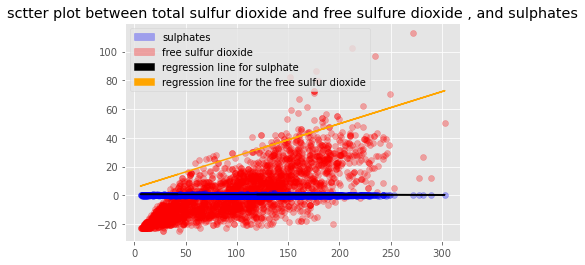

In [92]:
style.use('ggplot')
fig, ax = plt.subplots()
ax.scatter(x = finaldata["total sulfur dioxide"],y =[finaldata["free sulfur dioxide"]-finaldata["free sulfur dioxide"].mean()],c = "red",alpha = 0.3)
ax.scatter(x = finaldata["total sulfur dioxide"],y =[finaldata["sulphates"]-finaldata["sulphates"].mean()], c= "blue",alpha = 0.3)
pop_a = mpatches.Patch(color='red', label='free sulfur dioxide',alpha = 0.3)
pop_b = mpatches.Patch(color='blue', label='sulphates',alpha = 0.3)
pop_c = mpatches.Patch(color='black', label='regression line for sulphate')
pop_d = mpatches.Patch(color="orange", label = "regression line for the free sulfur dioxide")
plt.title("sctter plot between total sulfur dioxide and free sulfure dioxide , and sulphates")
ax.legend(handles=[pop_b,pop_a,pop_c,pop_d])
m1,b1 = best_fit_slope_and_intercept(finaldata["total sulfur dioxide"],finaldata["sulphates"])
best_fit_line = [(m1*x)+b1 for x in finaldata["total sulfur dioxide"]]
m2,b2 = best_fit_slope_and_intercept(finaldata["total sulfur dioxide"],finaldata["free sulfur dioxide"])
best_fit_line2 = [(m2*x)+b2 for x in finaldata["total sulfur dioxide"]]
plt.plot(finaldata["total sulfur dioxide"], best_fit_line, c = "black")
plt.plot(finaldata["total sulfur dioxide"],best_fit_line2,c = "orange")

According to this scatter plot we can find out that there is not relationshiop between sulphate and total sulfur dioxide, however in order to prevent the potential scaling mistakes I will write an individual scatter plot between sulphates and total sulfur dioxide.

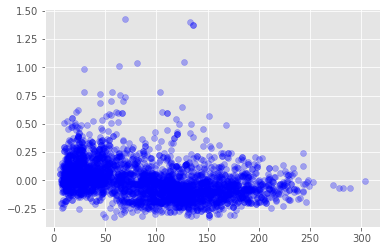

In [89]:
plt.scatter(x = finaldata["total sulfur dioxide"],y =[finaldata["sulphates"]-finaldata["sulphates"].mean()], c= "blue",alpha = 0.3)

According to the scatter plot we can make sure that the relation ship between sulphates and total sulfur dioxide are really small.

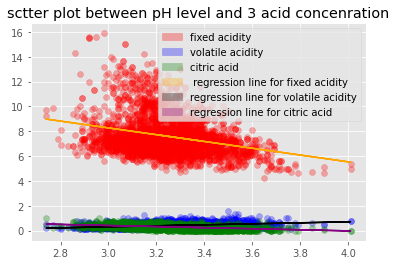

In [97]:
fig, ax = plt.subplots()
ax.scatter(x = finaldata["pH"],y =finaldata["fixed acidity"],c = "red",alpha = 0.3)
ax.scatter(x = finaldata["pH"],y =finaldata["volatile acidity"], c= "blue",alpha = 0.3)
ax.scatter(x = finaldata["pH"],y =finaldata["citric acid"], c= "green",alpha = 0.3)
pop_a = mpatches.Patch(color='red', label='fixed acidity',alpha = 0.3)
pop_b = mpatches.Patch(color='blue', label='volatile acidity',alpha = 0.3)
pop_c = mpatches.Patch(color='green', label='citric acid',alpha = 0.3)
pop_d = mpatches.Patch(color="orange", label=' regression line for fixed acidity',alpha = 0.3)
pop_e = mpatches.Patch(color="black", label='regression line for volatile acidity',alpha = 0.3)
pop_f = mpatches.Patch(color="purple", label='regression line for citric acid',alpha = 0.3)

m1,b1 = best_fit_slope_and_intercept(finaldata["pH"],finaldata["fixed acidity"])
best_fit_line = [(m1*x)+b1 for x in finaldata["pH"]]
m2,b2 = best_fit_slope_and_intercept(finaldata["pH"],finaldata["volatile acidity"])
best_fit_line2 = [(m2*x)+b2 for x in finaldata["pH"]]
m3,b3 = best_fit_slope_and_intercept(finaldata["pH"],finaldata["citric acid"])
best_fit_line3 = [(m3*x)+b3 for x in finaldata["pH"]]
plt.plot(finaldata["pH"], best_fit_line, c = "orange")
plt.plot(finaldata["pH"],best_fit_line2,c = "black")
plt.plot(finaldata["pH"],best_fit_line3,c = "purple")


plt.title("sctter plot between pH level and 3 acid concenration")
ax.legend(handles=[pop_a,pop_b,pop_c,pop_d,pop_e,pop_f])

This scatter plot shows that similar trend between pH and volatile acidity and ph with citric acid. As usual I will draw two individual scatter plot for this two relationship in order to prevent the potential scaling error. 

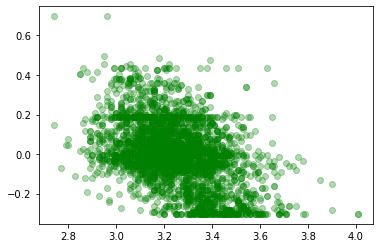

In [60]:
plt.scatter(x = finaldata["pH"],y =[finaldata["citric acid"]-finaldata["citric acid"].mean()], c= "green",alpha = 0.3)

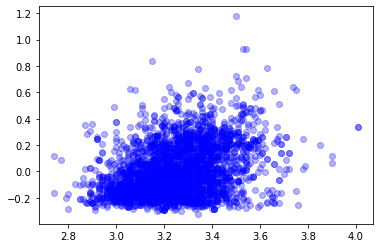

In [61]:
plt.scatter(x = finaldata["pH"],y =[finaldata["volatile acidity"]-finaldata["volatile acidity"].mean()], c= "blue",alpha = 0.3)


According to the above two individual scatter plot we can find out that there are some relationship exists, between pH and volatile acidity and ph with citric acid, so when we modified the model I will further analysis we will take these relationships into the consideration. 

## Improved model

As what we found previously we can find out that there is a relationship between acid and pH and sulphr dioxide and sulphate

In [167]:
trainx_final = trainx[["fixed acidity","pH","citric acid","total sulfur dioxide","sulphates","volatile acidity"]]
testx_final = testx[["fixed acidity","pH","citric acid","total sulfur dioxide","sulphates","volatile acidity"]]

In [127]:
trainx_final = trainx[["volatile acidity","pH","citric acid","total sulfur dioxide","free sulfur dioxide"]]
testx_final = testx[["volatile acidity","pH","citric acid","total sulfur dioxide","free sulfur dioxide"]]

In [158]:
lgm2 = linear_model.LinearRegression()
lgm2.fit(trainx_final, trainy)

LinearRegression()

In [159]:
lgm2.score(trainx_final,trainy)

0.8067603420451718

In [160]:
lgm2.score(testx_final,testy)

0.8071342694660371

In [161]:
lasso2 = linear_model.Lasso()
lasso2.fit(trainx_final, trainy)

Lasso()

In [162]:
lasso2.score(testx_final,testy)

0.6135309890352825

In [163]:
lasso2.score(trainx_final,trainy)

0.5907685282648212

In [164]:
logit2 = linear_model.LogisticRegression(solver="lbfgs")
logit2.fit(trainx_final, trainy)

/Users/harryzhang/miniforge3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/harryzhang/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [165]:
logit2.score(trainx_final,trainy)

0.967713004484305

In [166]:
logit2.score(testx_final,testy)

0.9675732217573222

# reference
dataset：
1. https://www.kaggle.com/datasets/rajyellow46/wine-quality/code
2. https://www.kaggle.com/code/brendangberkman/wine-type-prediction this link is a prediction project that is similar to mine. I did not copy/paraphrase any code from this project, but just in case that there might be some similar code with this project. 
3. https://archive.ics.uci.edu/ml/datasets/wine+quality

other reference：  
1. https://blog.csdn.net/qq_31279347/article/details/82795405
1. https://blog.csdn.net/wanglingli95/article/details/78887771
3. https://datacarpentry.org/python-socialsci/11-joins/index.html
4. https://www.cnblogs.com/yanjy-onlyone/p/11288098.html
5. https://www.geeksforgeeks.org/how-to-convert-categorical-data-to-binary-data-in-python/
6. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
7. https://scikit-learn.org/stable/glossary.html#term-random_state
8. https://stackoverflow.com/questions/36856428/attributeerror-function-object-has-no-attribute-bar-in-pandas
9. https://stackoverflow.com/questions/52404971/get-a-list-of-categories-of-categorical-variable-python-pandas
10. https://cmdlinetips.com/2019/03/how-to-make-grouped-boxplots-in-python-with-seaborn/"
11. https://www.javatpoint.com/how-to-create-a-dataframes-in-python
12. https://moonbooks.org/Articles/How-to-add-a-legend-for-a-scatter-plot-in-matplotlib-/
13. https://pythonprogramming.net/how-to-program-best-fit-line-machine-learning-tutorial/